In [177]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy.stats import ttest_ind
from scipy.stats.mstats import winsorize
warnings.filterwarnings('ignore')

In [38]:
df = pd.read_csv('/Users/basilyjohn/Downloads/Country-data.csv')

In [39]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [40]:
df.shape

(167, 10)

In [41]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [43]:
df.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [44]:
df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,167,167,Afghanistan,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
child_mort,167.0,NaN,NaN,NaN,38.27006,40.328931,2.6,8.25,19.3,62.1,208.0
exports,167.0,NaN,NaN,NaN,41.108976,27.41201,0.109,23.8,35.0,51.35,200.0
health,167.0,NaN,NaN,NaN,6.815689,2.746837,1.81,4.92,6.32,8.6,17.9
imports,167.0,NaN,NaN,NaN,46.890215,24.209589,0.0659,30.2,43.3,58.75,174.0
income,167.0,NaN,NaN,NaN,17144.688623,19278.067698,609.0,3355.0,9960.0,22800.0,125000.0
inflation,167.0,NaN,NaN,NaN,7.781832,10.570704,-4.21,1.81,5.39,10.75,104.0
life_expec,167.0,NaN,NaN,NaN,70.555689,8.893172,32.1,65.3,73.1,76.8,82.8
total_fer,167.0,NaN,NaN,NaN,2.947964,1.513848,1.15,1.795,2.41,3.88,7.49
gdpp,167.0,NaN,NaN,NaN,12964.155689,18328.704809,231.0,1330.0,4660.0,14050.0,105000.0


In [45]:
df.describe(include=[np.object])


AttributeError: module 'numpy' has no attribute 'object'.
`np.object` was a deprecated alias for the builtin `object`. To avoid this error in existing code, use `object` by itself. Doing this will not modify any behavior and is safe. 
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [46]:
df.describe(include=[object])


,country
count,167
unique,167
top,Afghanistan
freq,1


In [47]:
### no null values
df.isnull().sum()/len(df)*100


country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

In [48]:
df.shape

(167, 10)

In [49]:
df.head(25)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [50]:
df['country'].nunique()

167

In [54]:
df['child_mort'].max()

208.0

### EDA

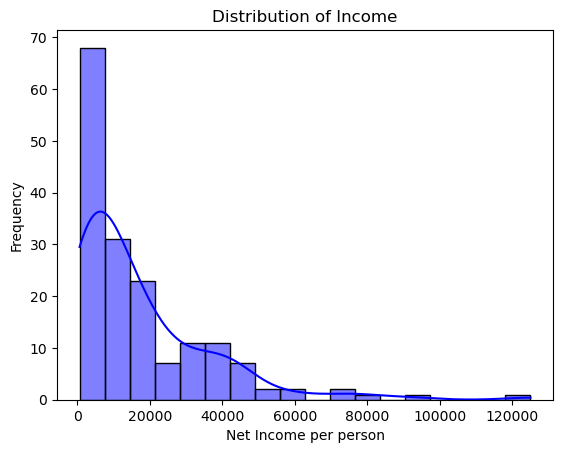

In [64]:
# Plot histogram for Distribution of Income

sns.histplot(df['income'], kde=True, color='blue', edgecolor='black')
plt.title('Distribution of Income')
plt.xlabel('Net Income per person')
plt.ylabel('Frequency')
plt.show()



##

## Income Disparity:

The significant skewness and spread indicate substantial income inequality across countries.
Policy makers and international aid organizations might focus on countries in the lower income ranges to address poverty and improve living standards.

The plot reveals a significant disparity in net income per person across countries, with a majority having low income and a few outliers with very high income. This information is crucial for strategic planning and resource allocation to address global income inequality.



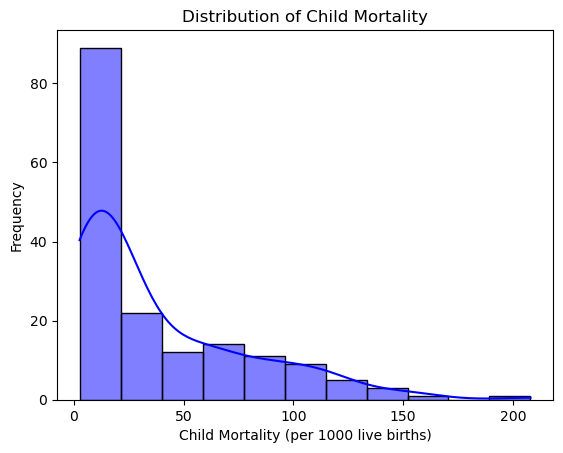

In [72]:
# Plot histogram for Child Mortality

sns.histplot(df['child_mort'], kde=True, color='blue', edgecolor='black')
plt.title('Distribution of Child Mortality')
plt.xlabel('Child Mortality (per 1000 live births)')
plt.ylabel('Frequency')
plt.show()



## Insights from the Histogram of Child Mortality (Smaller Bin Size)
With the smaller bin size, the histogram provides a more detailed view of the distribution of child mortality rates across countries:

Detailed Skewness:

The right-skewed distribution is more evident with smaller bins.
The histogram clearly shows that most countries have low child mortality rates, with a few having higher rates.
Peak and Range:

The peak of the distribution is around 0-10 deaths per 1000 live births, indicating that many countries fall within this range.
The histogram highlights the range of child mortality rates, showing a gradual decrease in frequency as the rates increase.
Outliers and Variability:

The smaller bins make it easier to spot countries with exceptionally high child mortality rates.
The variability within each range is more apparent, helping identify specific clusters of countries with similar mortality rates

## Analysis on whether to remove or not remove outlier
Representation: Removing outliers may misrepresent the data and lead to incorrect conclusions. If the goal is to identify countries most in need of aid, the outliers might actually be the countries that need the most attention.

In [68]:
df[df['income'] >100000]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
123,Qatar,9.0,62.3,1.81,23.8,125000,6.98,79.5,2.07,70300


In [69]:
df[df['income'] >80000]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
23,Brunei,10.5,67.4,2.84,28.0,80600,16.70,77.1,1.84,35300
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.62,81.3,1.63,105000
123,Qatar,9.0,62.3,1.81,23.8,125000,6.98,79.5,2.07,70300


In [70]:
df[df['income'] >70000]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300
82,Kuwait,10.8,66.7,2.63,30.4,75200,11.200,78.2,2.21,38500
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
123,Qatar,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70300
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600


In [74]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


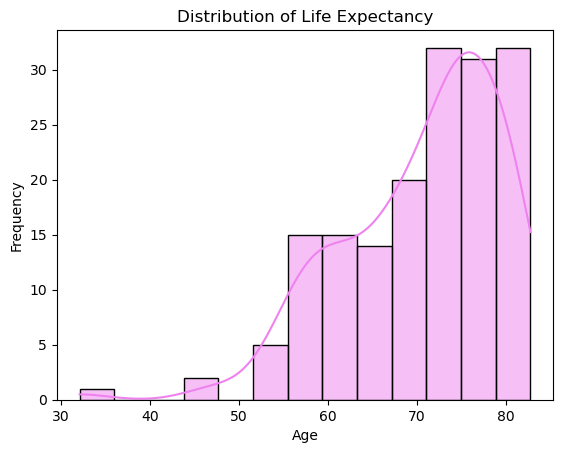

In [76]:
## Plot histogram for life_expec
sns.histplot(df['life_expec'], kde = True, color = 'violet', edgecolor = 'black')
plt.title('Distribution of Life Expectancy')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


## Key Observations:
Skewness:

The distribution is left-skewed, meaning most countries have higher life expectancy, with fewer countries having lower life expectancy values.
This indicates that a majority of countries have relatively high life expectancy.
Central Tendency:

The peak of the distribution is around the ages of 70 to 80 years, suggesting that many countries fall within this higher life expectancy range.
The highest frequency is observed for countries with life expectancy between 70 and 80 years.
Spread:

The life expectancy values are spread over a range from about 30 to over 80 years.
This range highlights the variation in life expectancy between countries.

In [79]:
df[df['life_expec'] <60]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.44,56.2,5.82,553
21,Botswana,52.5,43.60,8.30,51.3,13300,8.92,57.1,2.88,6350
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.81,57.9,5.87,575
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.91,57.3,5.11,1310
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446
32,Chad,150.0,36.80,4.53,43.5,1930,6.39,56.5,6.59,897
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334
40,Cote d'Ivoire,111.0,50.60,5.30,43.3,2690,5.39,56.3,5.27,1220
63,Guinea,109.0,30.30,4.93,43.2,1190,16.10,58.0,5.34,648


In [81]:
df.head(50)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.00,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.40,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.50,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.90,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.80,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.80,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.30,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.30,5.88,20.7,16000,13.800,69.1,1.92,5840


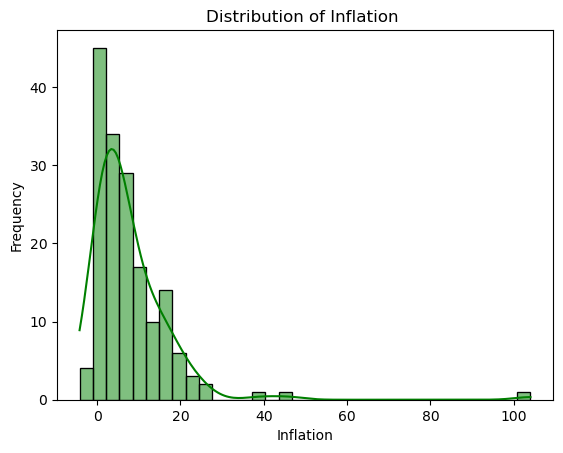

In [87]:
## Plot histogram for inflation
sns.histplot(df['inflation'], kde = True, color = 'green', edgecolor = 'black')
plt.title('Distribution of Inflation ')
plt.xlabel('Inflation')
plt.ylabel('Frequency')
plt.show()


## right skewed with some countries having huge inflation rates, this might not be possible, hence will remove them

In [85]:
df[df['inflation'] >30]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
103,Mongolia,26.1,46.7,5.44,56.7,7710,39.2,66.2,2.64,2650
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.0,60.5,5.84,2330
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.9,75.4,2.47,13500


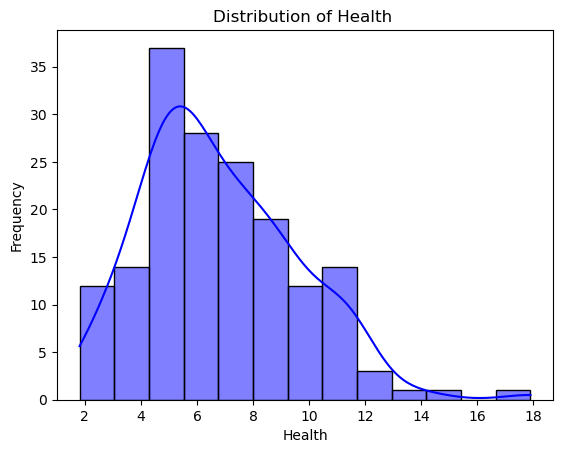

In [88]:
## Plot histogram for % of gdp spent for health per capita
sns.histplot(df['health'], kde = True, color = 'blue', edgecolor = 'black')
plt.title('Distribution of Health ')
plt.xlabel('Health')
plt.ylabel('Frequency')
plt.show()


In [89]:
df[df['health'] >13]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
101,"Micronesia, Fed. Sts.",40.0,23.5,14.2,81.0,3340,3.80,65.4,3.46,2860
132,Sierra Leone,160.0,16.8,13.1,34.5,1220,17.20,55.0,5.20,399
159,United States,7.3,12.4,17.9,15.8,49400,1.22,78.7,1.93,48400


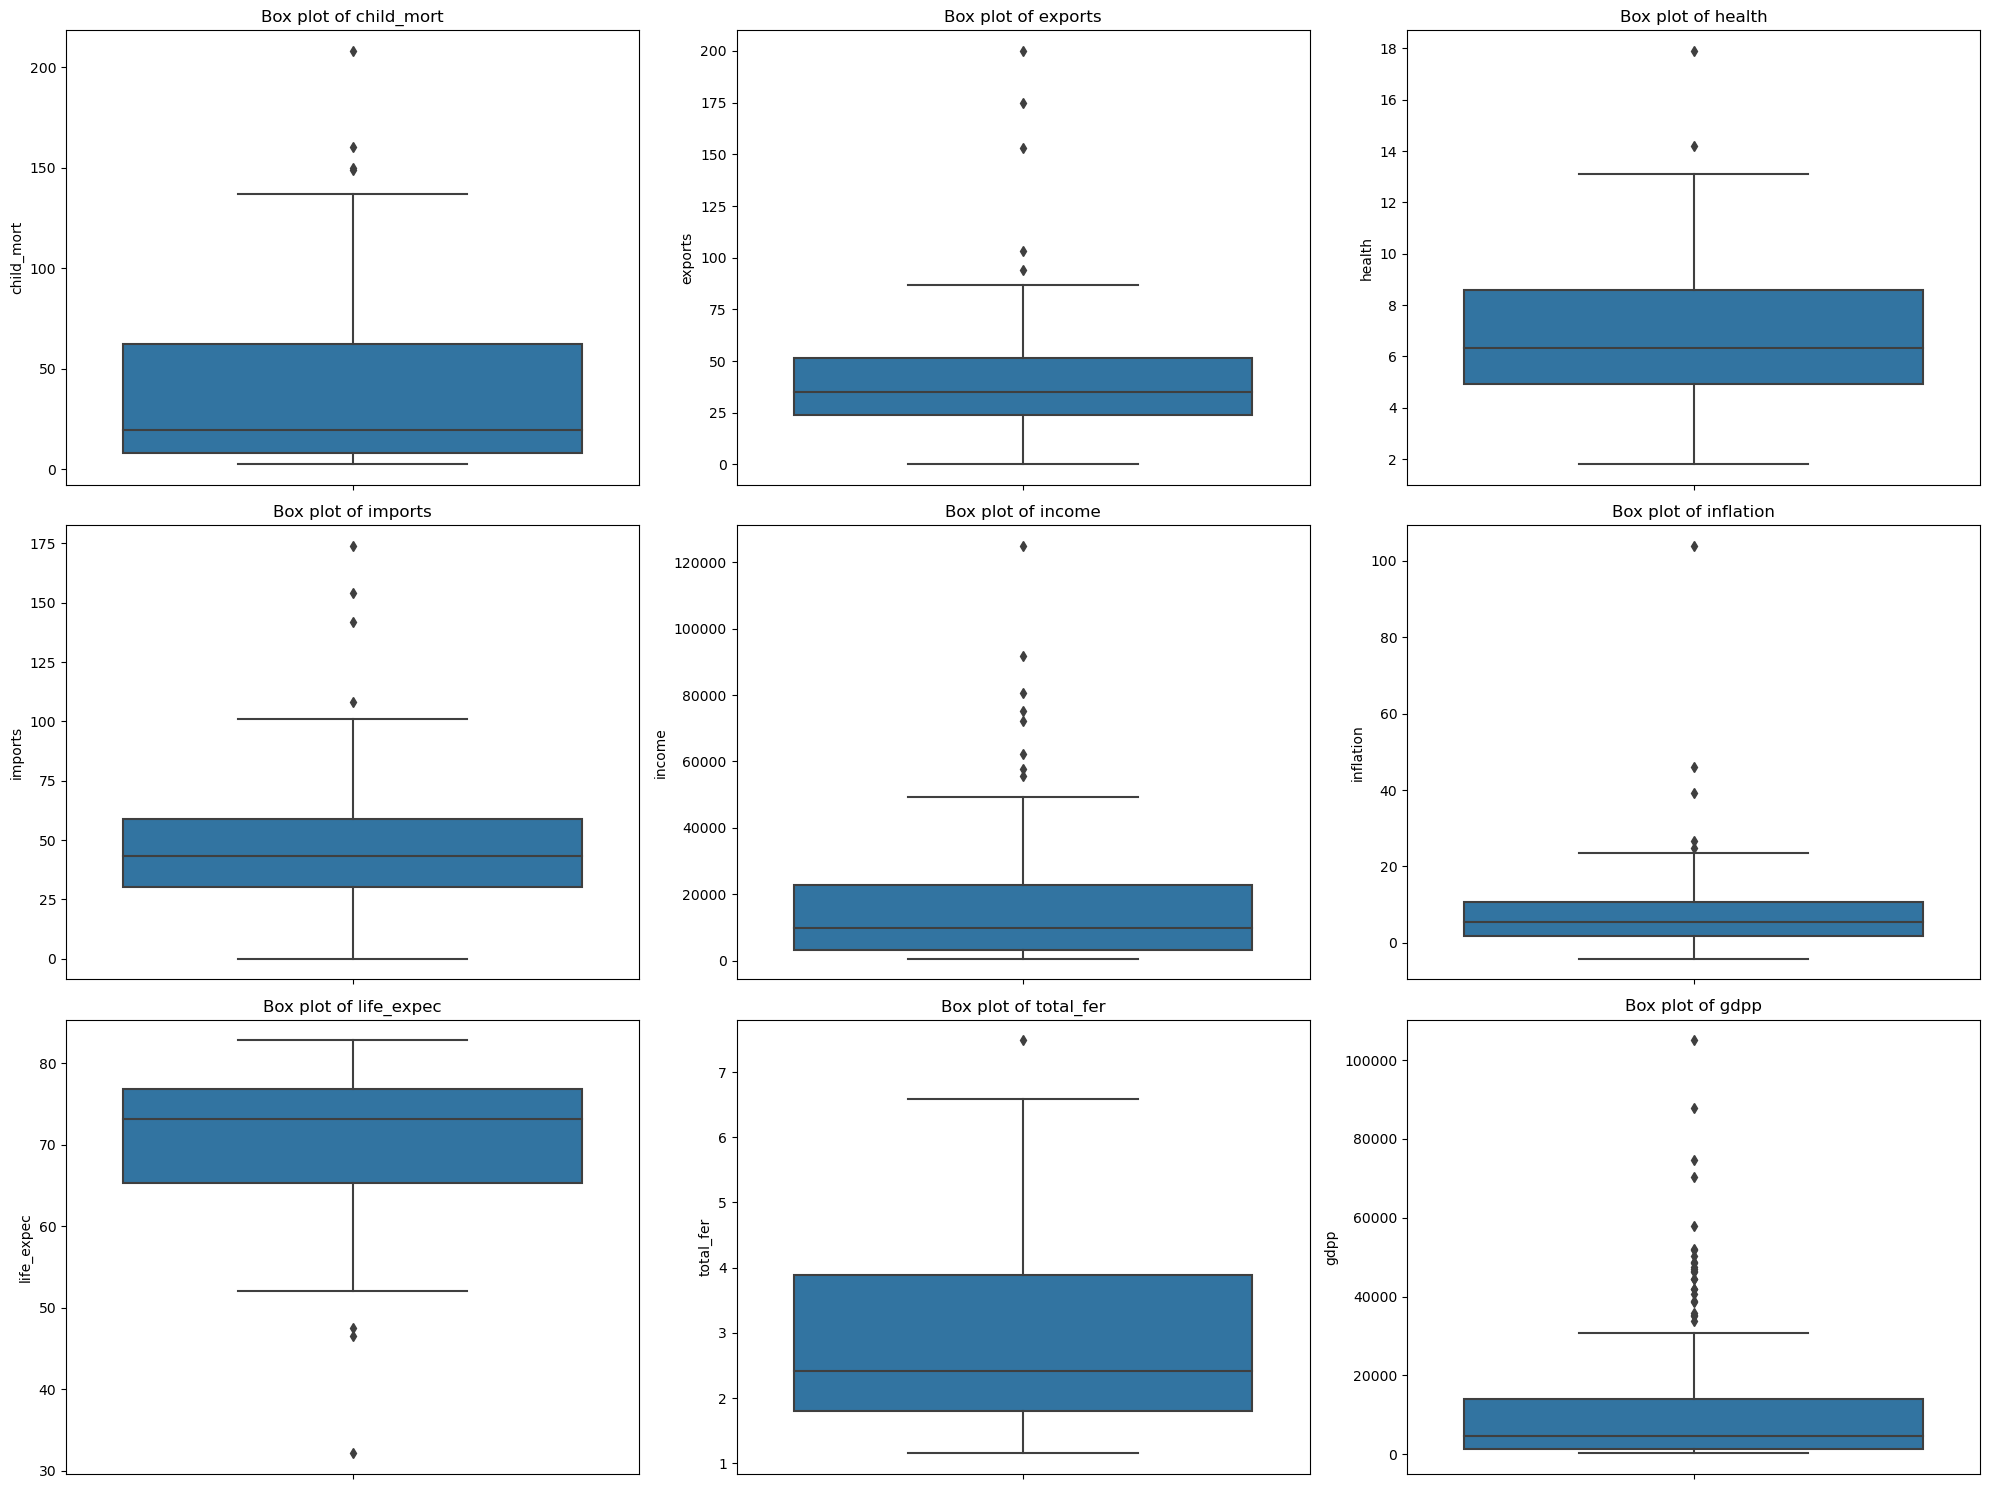

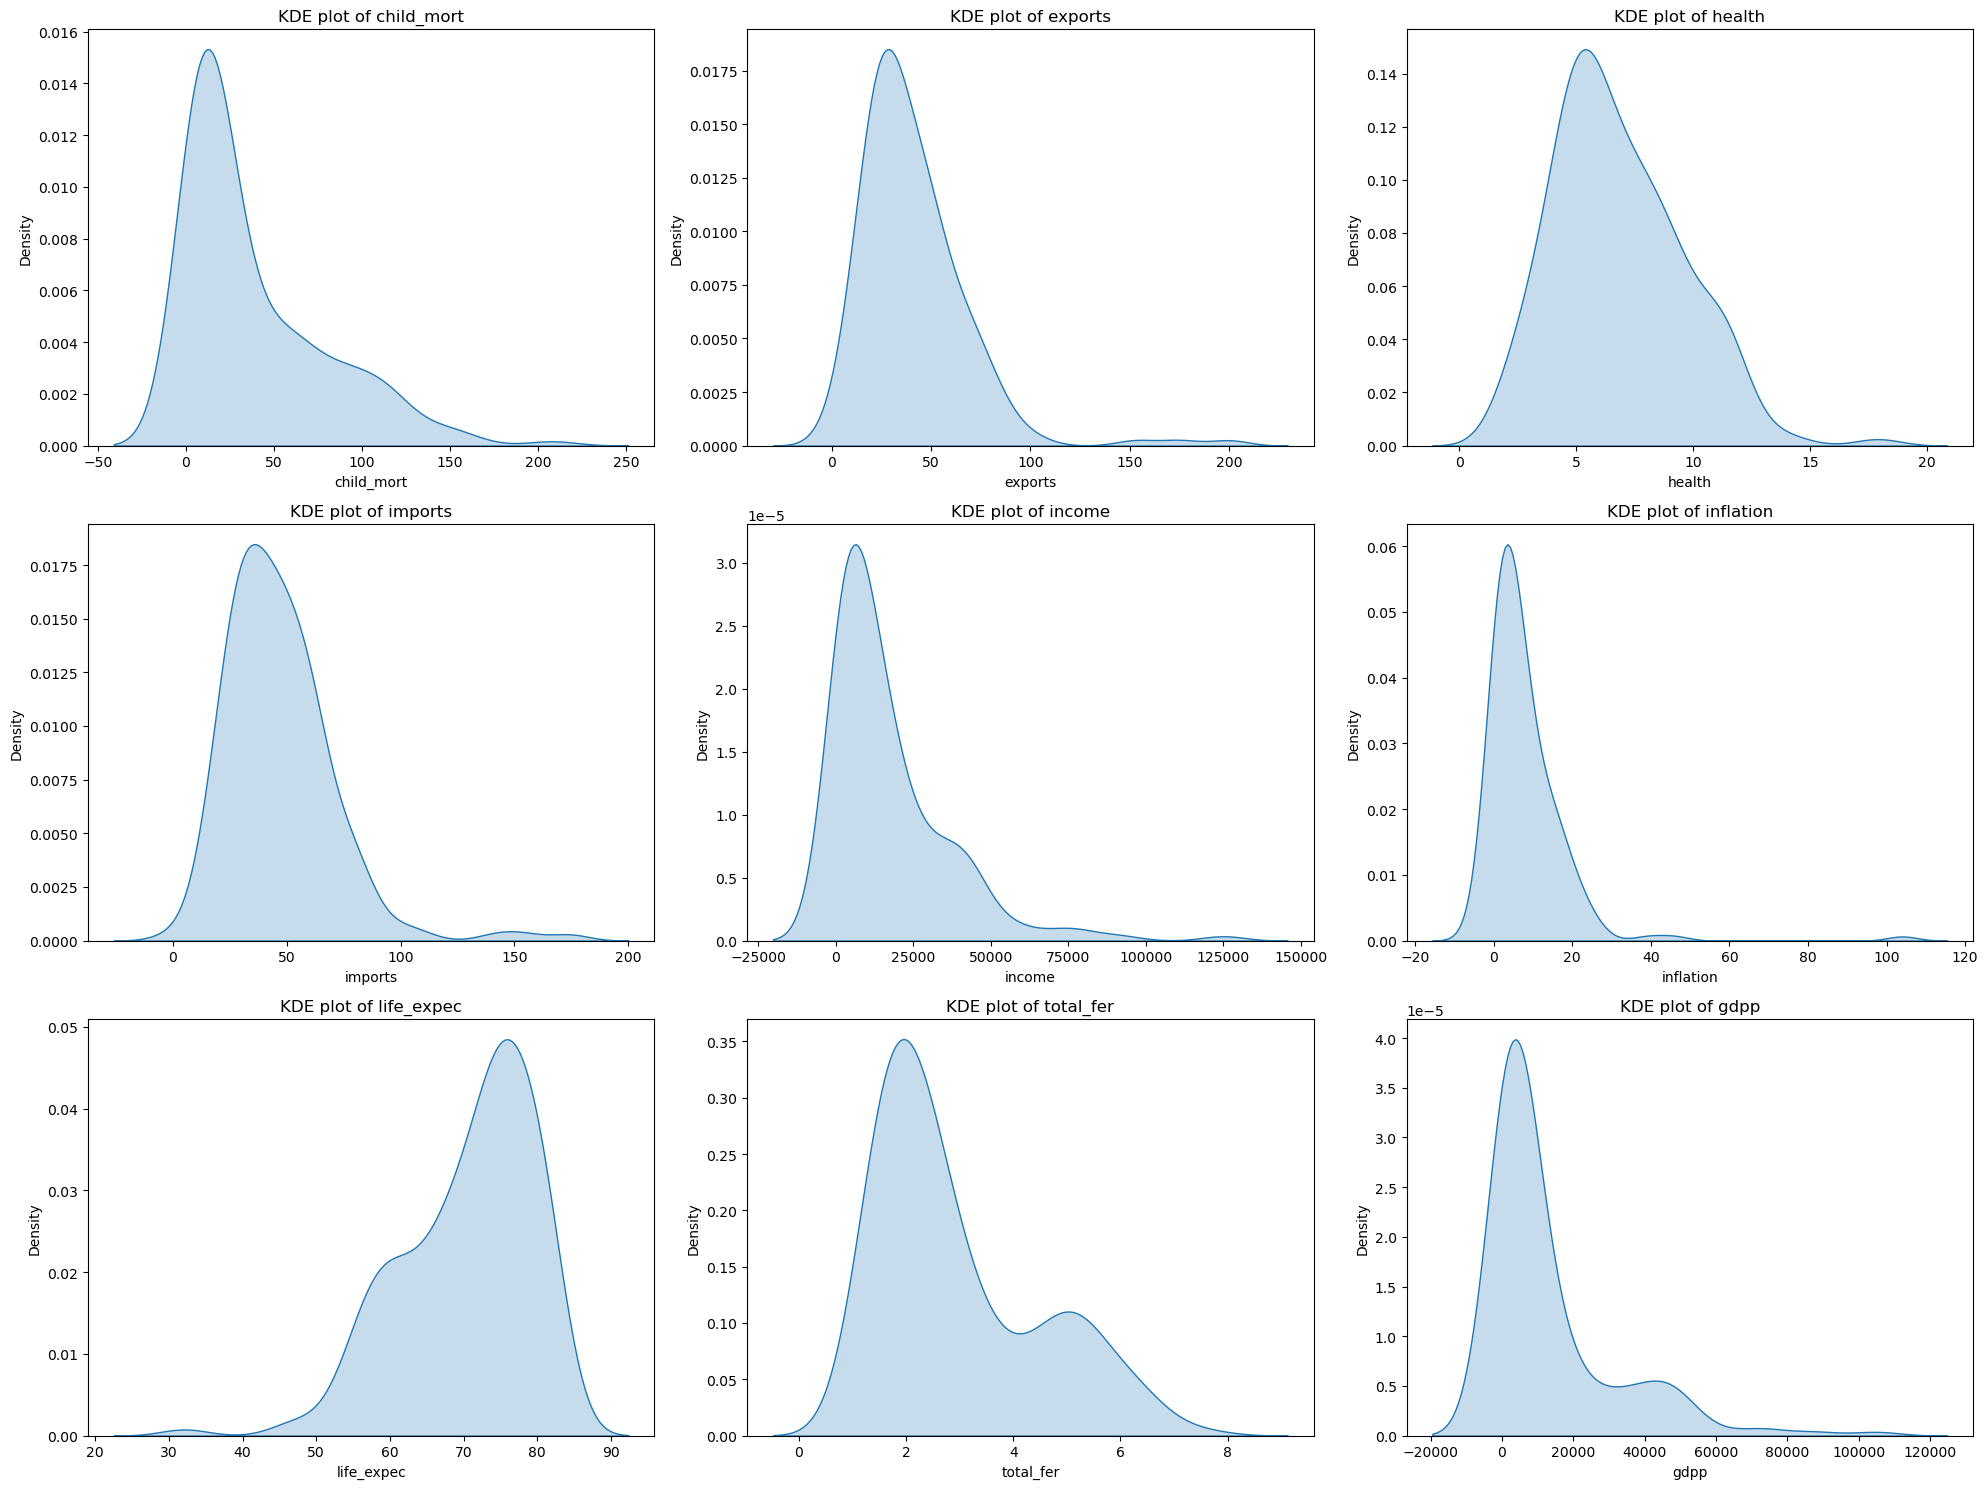

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of continuous variables for exploration
continuous_vars = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

# Create box plots for each continuous variable
plt.figure(figsize=(20, 15))
for i, var in enumerate(continuous_vars):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=df[var])
    plt.title(f'Box plot of {var}')

plt.tight_layout()
plt.show()

# Create KDE plots for each continuous variable
plt.figure(figsize=(20, 15))
for i, var in enumerate(continuous_vars):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(df[var].dropna(), shade=True)
    plt.title(f'KDE plot of {var}')

plt.tight_layout()
plt.show()


## Multivariate Analysis

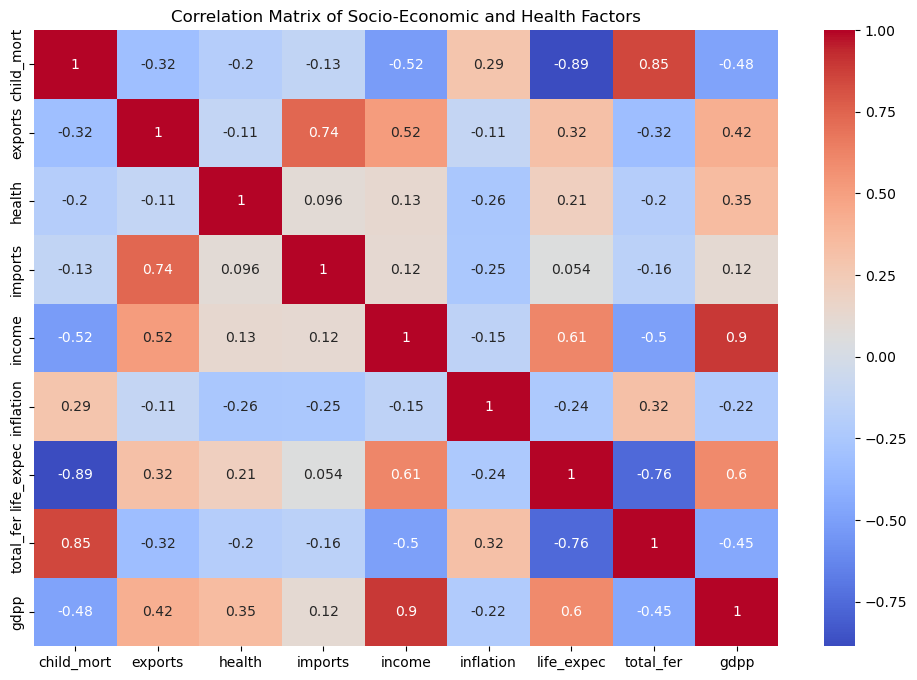

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix=df.corr()
plt.figure(figsize = (12,8))
sns.heatmap(correlation_matrix, annot = True, cmap= 'coolwarm')
plt.title('Correlation Matrix of Socio-Economic and Health Factors')
plt.show()

### Key Insights from the Heatmap

The heatmap visualizes the correlation matrix of socio-economic and health factors for various countries. Here are some key insights based on the correlation values:

1. **Child Mortality (`child_mort`)**:
   - **Negative Correlation with Life Expectancy (`life_expec`)**: -0.89
     - High child mortality is strongly associated with lower life expectancy.
   - **Negative Correlation with GDP per Capita (`gdpp`)**: -0.48
     - Higher child mortality rates are associated with lower GDP per capita.
   - **Positive Correlation with Total Fertility Rate (`total_fer`)**: 0.85
     - Higher child mortality rates are associated with higher fertility rates.

2. **Exports (`exports`)**:
   - **Positive Correlation with Income (`income`)**: 0.52
     - Countries with higher exports tend to have higher incomes.
   - **Positive Correlation with Imports (`imports`)**: 0.74
     - Higher exports are associated with higher imports, indicating a balanced trade system.

3. **Health Spending (`health`)**:
   - **Positive Correlation with GDP per Capita (`gdpp`)**: 0.35
     - Countries with higher health spending per capita tend to have higher GDP per capita.
   - **Weak Correlations with Other Factors**: 
     - Health spending does not show strong correlations with other factors, indicating its independent role in economic development and health outcomes.

4. **Income (`income`)**:
   - **Positive Correlation with GDP per Capita (`gdpp`)**: 0.9
     - Higher net income per person is strongly associated with higher GDP per capita.
   - **Negative Correlation with Total Fertility Rate (`total_fer`)**: -0.5
     - Higher income is associated with lower fertility rates.

5. **Inflation (`inflation`)**:
   - **Positive Correlation with GDP per Capita (`gdpp`)**: 0.6
     - Higher inflation is associated with higher GDP per capita, which may indicate rapid economic growth or instability.

6. **Life Expectancy (`life_expec`)**:
   - **Negative Correlation with Total Fertility Rate (`total_fer`)**: -0.76
     - Higher life expectancy is associated with lower fertility rates.
   - **Positive Correlation with GDP per Capita (`gdpp`)**: 0.6
     - Higher life expectancy is associated with higher GDP per capita.

7. **Total Fertility Rate (`total_fer`)**:
   - **Negative Correlation with GDP per Capita (`gdpp`)**: -0.45
     - Higher fertility rates are associated with lower GDP per capita.

### Summary of Insights

1. **Strong Relationships**:
   - **Child Mortality and Life Expectancy**: A strong negative correlation indicates that reducing child mortality can significantly improve life expectancy.
   - **Income and GDP per Capita**: A strong positive correlation shows that increasing income directly boosts GDP per capita.
   - **Exports and Imports**: A high positive correlation suggests a balanced trade system where countries with high exports also have high imports.

2. **Policy Implications**:
   - **Focus on Health**: Increasing health spending is crucial as it shows positive relationships with both GDP per capita and life expectancy.
   - **Economic Development**: Policies aimed at increasing income can significantly impact GDP per capita and overall economic development.

3. **Targeted Interventions**:
   - **Reducing Child Mortality**: Targeting child mortality can have wide-reaching effects on improving life expectancy and reducing fertility rates.
   - **Balancing Trade**: Encouraging balanced exports and imports can stabilize the economy and improve overall income.

By understanding these correlations, HELP International can make data-driven decisions to strategically allocate resources to the countries most in need and optimize the impact of their aid efforts.

In [1]:
import pandas as pd
import plotly.express as px
import itertools



# List of socio-economic and health factors
factors = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

# Create all possible pairs of factors
combinations = list(itertools.combinations(factors, 2))

# Create scatter plots for all pairs of variables
for x_var, y_var in combinations:
    fig = px.scatter(df, x=x_var, y=y_var, color='country', hover_name='country',
                     title=f'Scatter plot of {x_var} vs {y_var}',
                     labels={x_var: x_var.replace('_', ' ').title(), y_var: y_var.replace('_', ' ').title()})
    fig.show()


NameError: name 'df' is not defined

In [129]:
df_copy = df.copy()

## Hypothesis Testing

In [145]:
health_mean = df['health'].mean()
health_lowcount = df[df['health'] < health_mean]
health_highcount = df[df['health'] > health_mean]

In [149]:
## Hypothesis Testing: Increased health spending (% of GDP) leads to higher life expectancy (Life_expec).

t_test, p_value = ttest_ind(health_highcount['life_expec'], health_lowcount['life_expec'], alternative = 'greater')


alpha = 0.05
if p_value < alpha:
    print("There is a statistically significant difference in life expectancy between high and low health spending countries.")
else:
    print("There is no statistically significant difference in life expectancy between high and low health spending countries.")


There is a statistically significant difference in life expectancy between high and low health spending countries.


In [150]:
import pandas as pd
from scipy.stats import pearsonr, ttest_ind



# Correlation Analysis
correlation_coefficient, p_value_corr = pearsonr(df['total_fer'], df['income'])

print(f"Correlation Coefficient between Total Fertility and Income: {correlation_coefficient}")
print(f"P-Value for Correlation: {p_value_corr}")

if p_value_corr < 0.05:
    print("There is a statistically significant correlation between Total Fertility and Income.")
else:
    print("There is no statistically significant correlation between Total Fertility and Income.")

# T-Test
fertility_mean = df['total_fer'].mean()

# Define groups
high_fertility = df[df['total_fer'] > fertility_mean]
low_fertility = df[df['total_fer'] <= fertility_mean]

# Extract income
income_high_fertility = high_fertility['income']
income_low_fertility = low_fertility['income']

# Perform the t-test
t_statistic, p_value_ttest = ttest_ind(income_high_fertility, income_low_fertility, alternative='less')

print(f"T-Statistic: {t_statistic}")
print(f"P-Value for T-Test: {p_value_ttest}")

if p_value_ttest < 0.05:
    print("There is a statistically significant difference in income between high and low fertility countries.")
else:
    print("There is no statistically significant difference in income between high and low fertility countries.")


Correlation Coefficient between Total Fertility and Income: -0.5018400532297551
P-Value for Correlation: 4.8858748799787674e-12
There is a statistically significant correlation between Total Fertility and Income.
T-Statistic: -6.779639724662907
P-Value for T-Test: 1.0205641281155035e-10
There is a statistically significant difference in income between high and low fertility countries.


In [152]:
#### Hypothesis Testing: Higher income levels are associated with lower child mortality rates.
correlation_coefficient, p_value_corr = pearsonr(df['income'], df['child_mort'])
print(f"Correlation Coefficient b/w Income and child_mor rate: {correlation_coefficient}")
print(f"P-Value for Correlation: {p_value_corr}")

Correlation Coefficient b/w Income and child_mor rate: -0.5243150164994346
P-Value for Correlation: 3.538801381630339e-13


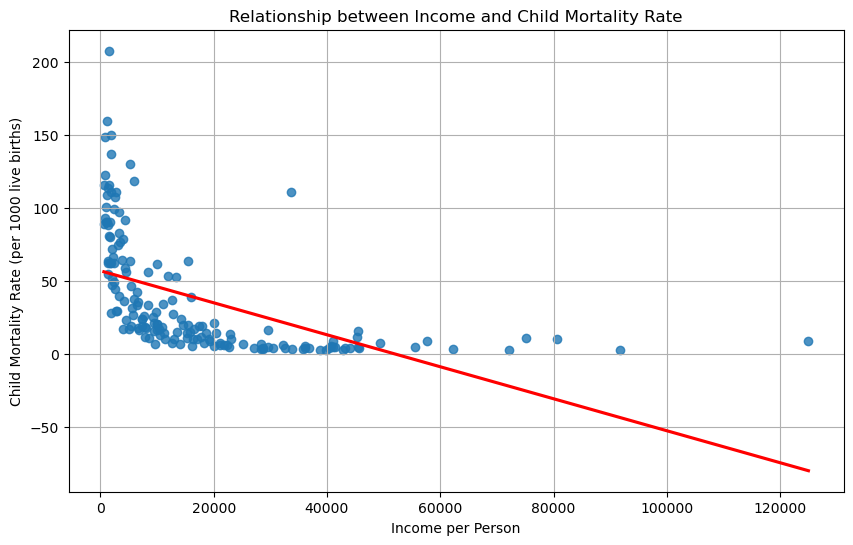

In [153]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='income', y='child_mort', data=df, ci=None, line_kws={'color': 'red'})
plt.title('Relationship between Income and Child Mortality Rate')
plt.xlabel('Income per Person')
plt.ylabel('Child Mortality Rate (per 1000 live births)')
plt.grid(True)
plt.show()


In [154]:
## Hypothesis: Higher inflation rates are associated with lower GDP per capita, indicating economic instability.


# Correlation Analysis
correlation_coefficient, p_value_corr = pearsonr(df['inflation'], df['gdpp'])

print(f"Correlation Coefficient between Inflation and GDP per Capita: {correlation_coefficient}")
print(f"P-Value for Correlation: {p_value_corr}")

if p_value_corr < 0.05:
    print("There is a statistically significant correlation between inflation and GDP per capita.")
else:
    print("There is no statistically significant correlation between inflation and GDP per capita.")

# T-Test
inflation_median = df['inflation'].median()

# Define groups
high_inflation = df[df['inflation'] > inflation_median]
low_inflation = df[df['inflation'] <= inflation_median]

# Extract GDP per capita
gdpp_high_inflation = high_inflation['gdpp']
gdpp_low_inflation = low_inflation['gdpp']

# Perform the t-test
t_statistic, p_value_ttest = ttest_ind(gdpp_high_inflation, gdpp_low_inflation, alternative='less')

print(f"T-Statistic: {t_statistic}")
print(f"P-Value for T-Test: {p_value_ttest}")

if p_value_ttest < 0.05:
    print("There is a statistically significant difference in GDP per capita between high and low inflation countries.")
else:
    print("There is no statistically significant difference in GDP per capita between high and low inflation countries.")


Correlation Coefficient between Inflation and GDP per Capita: -0.2216310581015387
P-Value for Correlation: 0.003995984320917074
There is a statistically significant correlation between inflation and GDP per capita.
T-Statistic: -3.6881176832049887
P-Value for T-Test: 0.00015316518195859752
There is a statistically significant difference in GDP per capita between high and low inflation countries.


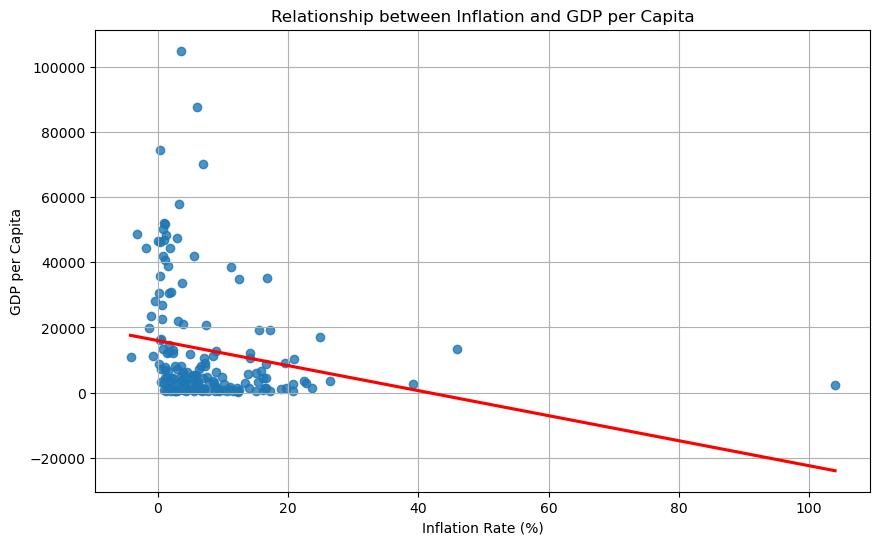

In [156]:


# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='inflation', y='gdpp', data=df, ci=None, line_kws={'color': 'red'})
plt.title('Relationship between Inflation and GDP per Capita')
plt.xlabel('Inflation Rate (%)')
plt.ylabel('GDP per Capita')
plt.grid(True)
plt.show()


In [179]:



# Load the dataset


def calculate_iqr_outliers(data, feature):
    """
    Calculate IQR and identify outliers for a given feature.
    
    :param data: pandas DataFrame
    :param feature: column name for the feature to analyze
    :return: lower_bound, upper_bound, outliers
    """
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    

    # Calculate bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    
    return lower_bound, upper_bound, outliers, Q1, Q3

def winsorize_feature(data, feature):
    """
    Apply winsorization to cap outliers for a given feature.
    
    :param data: pandas DataFrame
    :param feature: column name for the feature to winsorize
    :return: winsorized feature
    """
    

    # Apply winsorization
    winsorized_feature = winsorize(data[feature], limits=(0.035, 0.035))

    return winsorized_feature

# Features to analyze
features = [ 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']

# Analyze and winsorize each feature
for feature in features:
    lower_bound, upper_bound, outliers, Q1, Q3 = calculate_iqr_outliers(df, feature)
    print(f"\nFeature: {feature}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Number of Outliers: {len(outliers)}")
    print(f"Q1: {Q1}")
    print(f"Q3: {Q3}")
    
    
    # Apply winsorization
    df[feature] = winsorize_feature(df, feature)





Feature: child_mort
Lower Bound: -72.525
Upper Bound: 142.875
Number of Outliers: 4
Q1: 8.25
Q3: 62.1

Feature: exports
Lower Bound: -17.524999999999988
Upper Bound: 92.67499999999998
Number of Outliers: 5
Q1: 23.8
Q3: 51.349999999999994

Feature: health
Lower Bound: -0.6000000000000023
Upper Bound: 14.120000000000005
Number of Outliers: 2
Q1: 4.92
Q3: 8.600000000000001

Feature: imports
Lower Bound: -12.625000000000004
Upper Bound: 101.575
Number of Outliers: 4
Q1: 30.2
Q3: 58.75

Feature: income
Lower Bound: -25812.5
Upper Bound: 51967.5
Number of Outliers: 8
Q1: 3355.0
Q3: 22800.0

Feature: inflation
Lower Bound: -11.6
Upper Bound: 24.16
Number of Outliers: 5
Q1: 1.81
Q3: 10.75

Feature: life_expec
Lower Bound: 48.05
Upper Bound: 94.05
Number of Outliers: 3
Q1: 65.3
Q3: 76.8

Feature: total_fer
Lower Bound: -1.3325
Upper Bound: 7.0075
Number of Outliers: 1
Q1: 1.795
Q3: 3.88

Feature: gdpp
Lower Bound: -17750.0
Upper Bound: 33130.0
Number of Outliers: 25
Q1: 1330.0
Q3: 14050.0


In [187]:
df.head(19)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,17.2,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,81.9,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [189]:
new_df = df.copy()

In [202]:
count_to_int = { country:i for i, country in enumerate(df['country'])}
df['country_int'] = df['country'].map(country_to_int)

max_bits = df['country_int'].max().bit_length()

for i in range(max_bits):
    df[f'country_bits {i}'] = new_df['country_int'].apply(lambda x : (x >> i) &1)
    




In [301]:
with open('country_to_int.pkl', 'wb') as file:
    pickle.dump(country_to_int, file)

## Reasons for using Binary Encoding
Why Binary Encoding is Efficient for Clustering
Reduced Dimensionality:

Binary encoding uses fewer columns compared to one-hot encoding. For a feature with 
n unique categories, binary encoding uses 
⌈log 2(n)⌉  columns. This reduction in dimensionality is crucial for clustering algorithms that may struggle with high-dimensional data.
Example: For 167 countries, binary encoding requires only 8 columns, whereas one-hot encoding would need 166 columns.
Unique Representation:

Each category is uniquely represented, ensuring that the encoded data preserves the distinction between categories without introducing any ordinal relationships.
Compact Representation:

Binary encoding provides a compact representation that is easier to work with in terms of memory and computation, especially in large datasets.
Preservation of Relationships:

While binary encoding reduces dimensionality, it still maintains some level of categorical distinction. This can be beneficial when clustering, as it preserves the unique identity of each category.
Suitable for Distance-Based Algorithms:

Clustering algorithms like K-Means and Hierarchical Clustering use distance measures to define clusters. Binary encoding allows for a meaningful calculation of distances between encoded data points

In [207]:
df.drop('country_int', inplace = True, axis =1)

In [209]:
df.drop('country', inplace = True, axis =1)

In [210]:
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country_bin_0,country_bin_1,country_bin_2,country_bin_3,country_bin_4,country_bin_5,country_bin_6,country_bin_7
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,0,0,0,0,0,0,0
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,0,0,0,0,0,0,0
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,1,0,0,0,0,0,0
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,1,0,0,0,0,0,0
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,0,1,0,0,0,0,0


### Feature Engg


In [218]:
life_expec_mean = df['life_expec'].mean()
gdpp_mean = df['gdpp'].mean()
child_mort_mean = df['child_mort'].mean()

df['high_childmort_rate'] = (df['child_mort'] > child_mort_mean).astype(int)
df['high_gdpp'] = (df['gdpp'] > gdpp_mean).astype(int)
df['high_lif_expec'] = (df['life_expec'] > life_expec_mean).astype(int)


In [215]:
life_expec_mean, gdpp_mean, child_mort_mean

(70.78383233532935, 12157.125748502995, 37.358682634730535)

In [219]:
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country_bin_0,country_bin_1,country_bin_2,country_bin_3,country_bin_4,country_bin_5,country_bin_6,country_bin_7,high_childmort_rate,high_gdpp,high_lif_expec
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,0,0,0,0,0,0,0,1,0,0
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,0,0,0,0,0,0,0,0,0,1
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,1,0,0,0,0,0,0,0,0,1
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,1,0,0,0,0,0,0,1,0,0
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,0,1,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0,1,0,0,0,1,0,1,0,0,0
163,17.1,28.5,4.91,17.6,16500,23.60,75.4,2.47,13500,1,1,0,0,0,1,0,1,0,1,1
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0,0,1,0,0,1,0,1,0,0,1
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1,0,1,0,0,1,0,1,1,0,0


In [225]:
df['economic_dependence_ratio'] = df['exports']/ df['imports']
df['health_spending_vs_gdp_ratio'] = df['health'] / df['gdpp']
df['fertility_vs_mortality_ratio'] = df['total_fer'] / df['child_mort']



In [226]:
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country_bin_0,...,country_bin_4,country_bin_5,country_bin_6,country_bin_7,high_childmort_rate,high_gdpp,high_lif_expec,economic_dependence_ratio,health_spending_vs_gdp_ratio,fertility_vs_mortality_ratio
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,...,0,0,0,0,1,0,0,0.222717,0.013707,0.064523
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,...,0,0,0,0,0,0,1,0.576132,0.001601,0.099398
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,...,0,0,0,0,0,0,1,1.222930,0.000935,0.105861
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,...,0,0,0,0,1,0,0,1.452214,0.000807,0.051765
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,...,0,0,0,0,0,1,1,0.772496,0.000494,0.206796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0,...,0,1,0,1,0,0,0,0.884250,0.001768,0.119863
163,17.1,28.5,4.91,17.6,16500,23.60,75.4,2.47,13500,1,...,0,1,0,1,0,1,1,1.619318,0.000364,0.144444
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0,...,0,1,0,1,0,0,1,0.897756,0.005221,0.083691
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1,...,0,1,0,1,1,0,0,0.872093,0.003954,0.082948


In [227]:
# Child Well-being Index
df['child_wellbeing_index'] = 1 / (df['child_mort'] * df['total_fer'])

# Income vs. Cost of Living
df['real_income'] = df['income'] / (1 + df['inflation'])

# Life Expectancy Improvement Potential
df['life_expectancy_potential'] = df['life_expec'] / df['health']


In [228]:
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country_bin_0,...,country_bin_7,high_childmort_rate,high_gdpp,high_lif_expec,economic_dependence_ratio,health_spending_vs_gdp_ratio,fertility_vs_mortality_ratio,child_wellbeing_index,real_income,life_expectancy_potential
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,...,0,1,0,0,0.222717,0.013707,0.064523,0.001905,154.214559,7.414248
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,...,0,0,0,1,0.576132,0.001601,0.099398,0.036510,1808.743169,11.648855
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,...,0,0,0,1,1.222930,0.000935,0.105861,0.012675,754.385965,18.345324
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,...,0,1,0,0,1.452214,0.000807,0.051765,0.001364,252.136752,21.087719
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,...,0,0,1,1,0.772496,0.000494,0.206796,0.045581,7827.868852,12.736318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0,...,1,0,0,0,0.884250,0.001768,0.119863,0.009785,814.917127,12.000000
163,17.1,28.5,4.91,17.6,16500,23.60,75.4,2.47,13500,1,...,1,0,1,1,1.619318,0.000364,0.144444,0.023676,670.731707,15.356415
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0,...,1,0,0,1,0.897756,0.005221,0.083691,0.022009,342.748092,10.687135
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1,...,1,1,0,0,0.872093,0.003954,0.082948,0.003803,182.113821,13.030888


In [231]:
new_df2 = df.copy()

In [230]:
df.shape

(167, 26)

In [233]:
# Scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [298]:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [234]:
df_scaled

array([[ 1.41262544, -1.43363085,  0.31784334, ..., -0.7875959 ,
        -0.33139326, -0.90336737],
       [-0.55494913, -0.55936993, -0.08555246, ..., -0.19245606,
        -0.27810468, -0.09540086],
       [-0.26890229, -0.0542414 , -1.01767092, ..., -0.60237373,
        -0.31206311,  1.18229093],
       ...,
       [-0.37583569,  1.57771231,  0.028025  , ..., -0.44183354,
        -0.32532103, -0.27889792],
       [ 0.50636487, -0.46222983, -0.62210805, ..., -0.75494459,
        -0.33049469,  0.16829219],
       [ 1.22281866, -0.12223948, -0.34403909, ..., -0.78203109,
        -0.32931741, -0.55901629]])

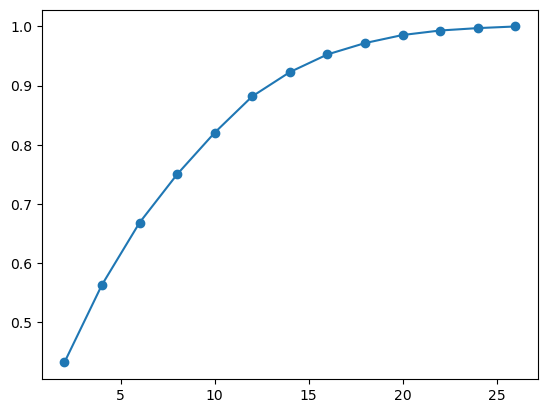

In [239]:
## trying to find the maxim_variance 
from sklearn.decomposition import PCA


info = []
cs = [2,4,6,8,10,12,14,16,18,20,22,24,26]

for i in cs:
    pca = PCA(n_components=i)
    pca.fit(df_scaled)
    info.append(pca.explained_variance_ratio_.sum())
    
plt.plot(cs,info, '-o')

In [303]:
pca = PCA(n_components=14)

vis = pca.fit_transform(df_scaled)

In [304]:
with open('pca.pkl', 'wb') as file:
    pickle.dump(pca, file)

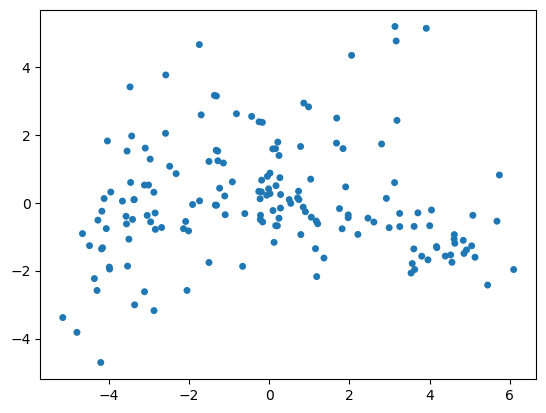

In [244]:
fig, ax = plt.subplots()

"""
  on x-axis we use 0th dimension of z1
  on y-axis we use 1th dimension of z2
"""

im = ax.scatter(vis[:,0], vis[:,1], s=25, edgecolor='none')


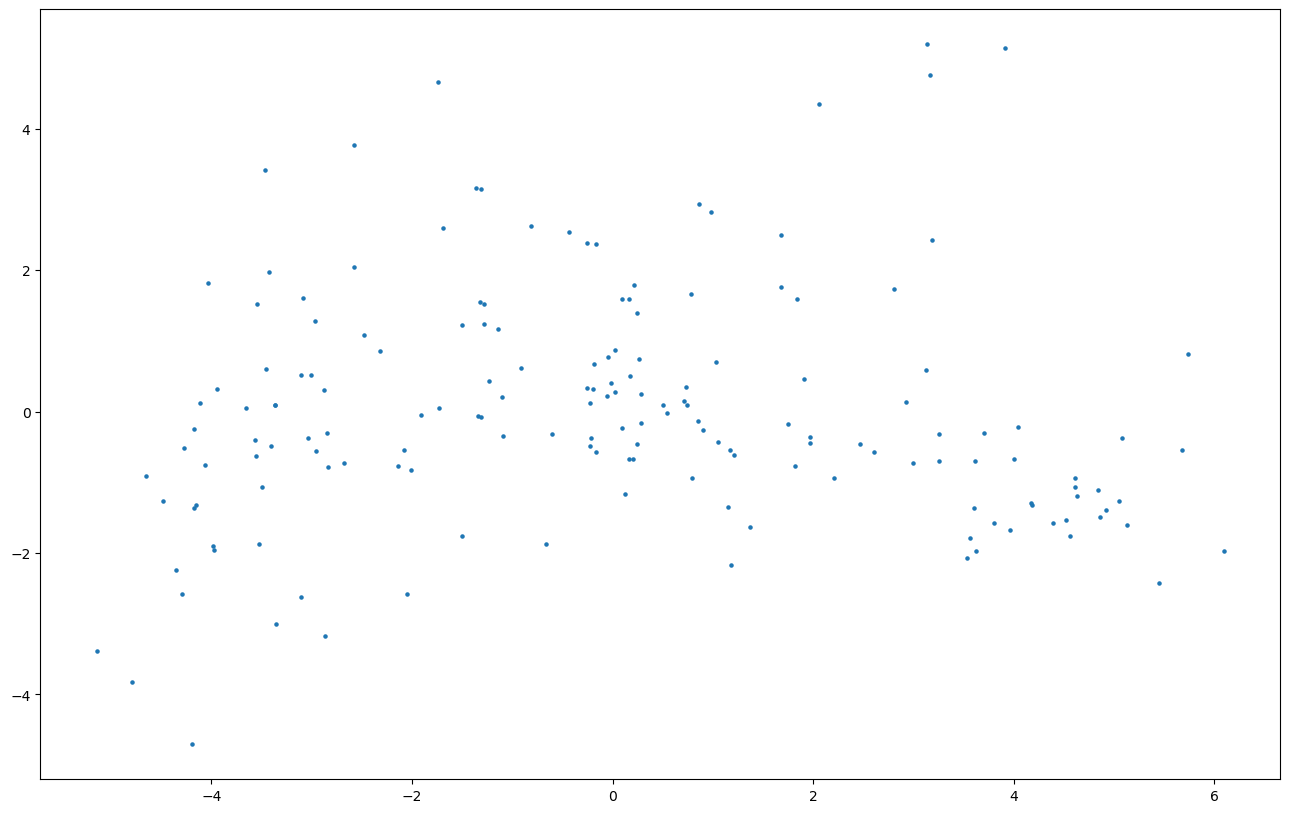

In [302]:

## visualization using tsne

from sklearn.manifold import TSNE
plt.figure(figsize=(16, 10))

pca_tsne = TSNE(n_components=2, perplexity=25, random_state=0)

plt.scatter(vis[:,0], vis[:,1], s=5)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


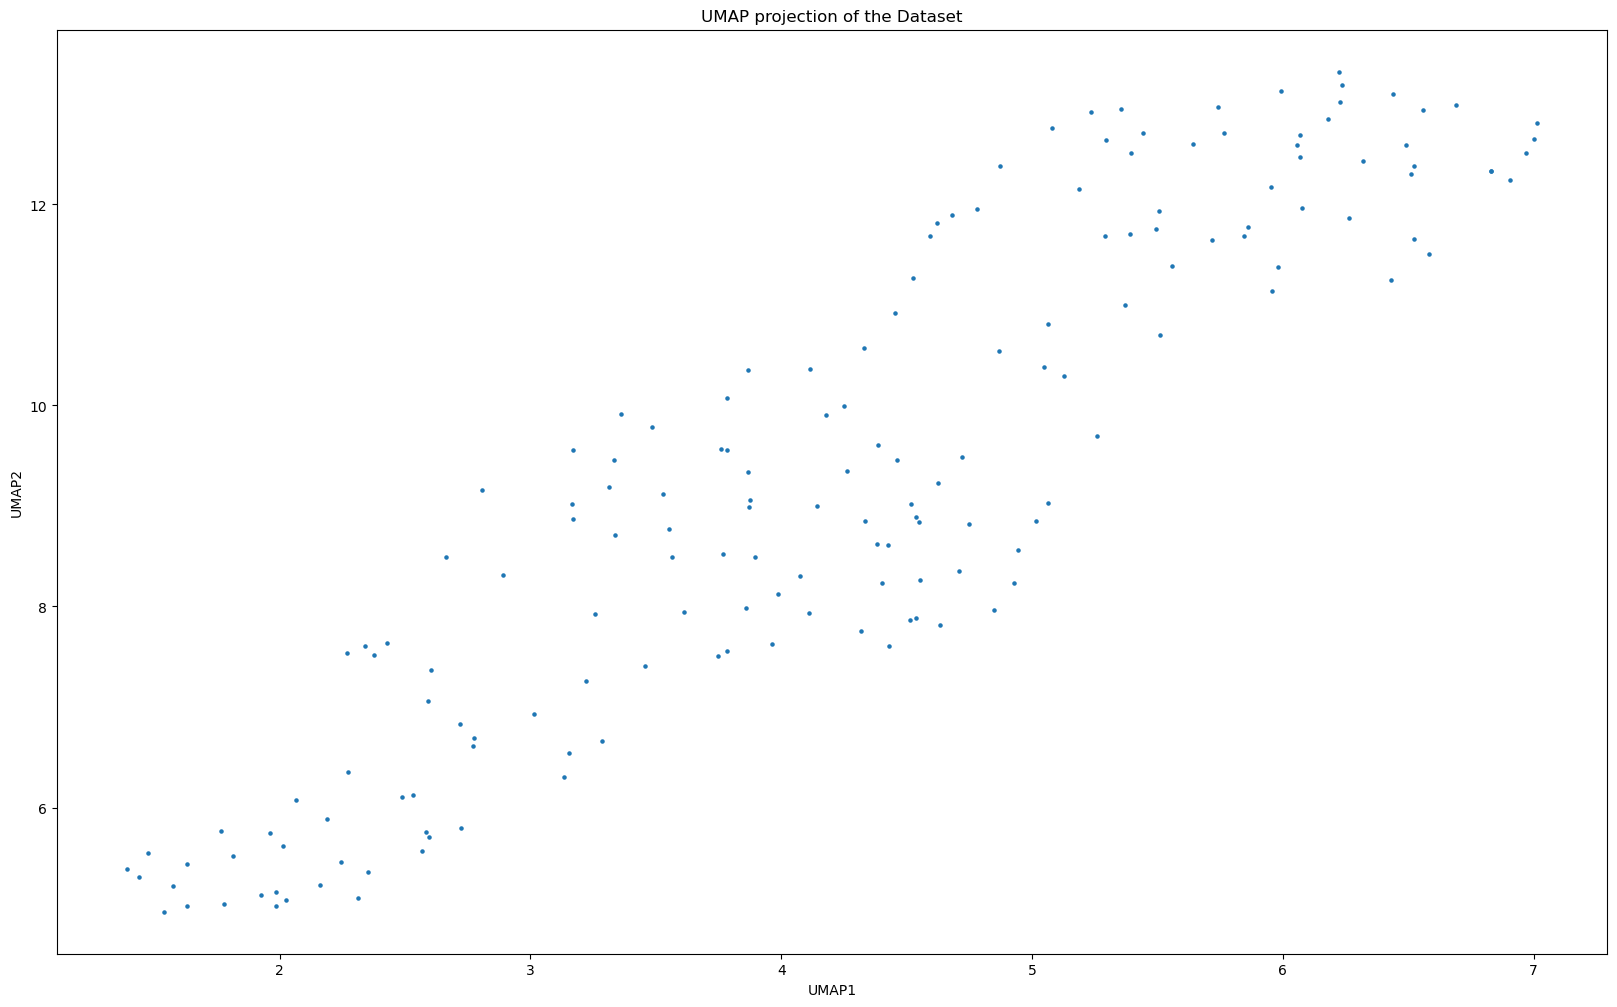

In [246]:
visualization using tsne
from umap import UMAP


# It is common to scale the data, even if UMAP is quite robust to different scales.

# Define the UMAP parameters
umap_reducer = UMAP(n_neighbors=25, min_dist=0.1, n_components=2, random_state=42)

# Fit and transform the dataset


umap_embedding = umap_reducer.fit_transform(df_scaled)

# Plot the UMAP output
plt.figure(figsize=(20, 12))
plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], s=5)
plt.title('UMAP projection of the Dataset')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.show()

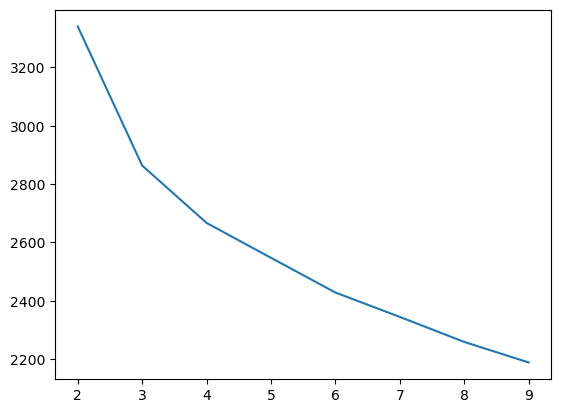

In [247]:
## elbow method for selecting the cluster
from sklearn.cluster import KMeans

# elbow = []
# for k in range(2,10):
#     kmeans = KMeans(n_clusters=k)
#     kmeans.fit(scaled_df)
#     elbow.append(kmeans.inertia_)
    
# plt.plot(range(2,10), elbow)

elbow = []

for k in range(2,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_scaled)
    elbow.append(kmeans.inertia_)
    
plt.plot(range(2,10), elbow)

In [248]:
vis.shape

(167, 14)

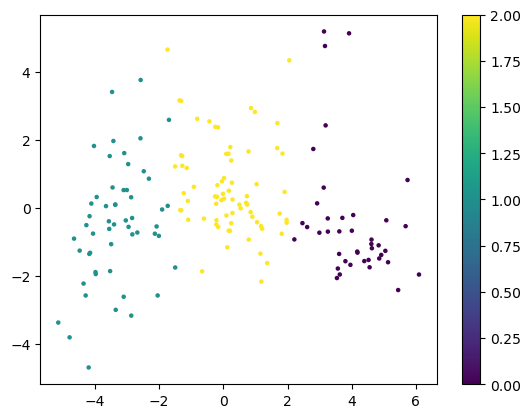

In [249]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(vis)
plt.scatter(vis[:, 0], vis[:, 1], s=5, c=kmeans.labels_)
plt.colorbar()

In [318]:
kmeans.labels_

array([2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 0, 0, 2, 1, 1, 0, 1, 2, 1, 1, 1, 2,
       1, 0, 1, 2, 2, 2, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 0, 0, 0,
       0, 1, 1, 1, 1, 2, 2, 0, 1, 0, 0, 1, 2, 1, 0, 2, 0, 1, 1, 2, 2, 2,
       2, 0, 0, 2, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 2, 2, 0, 1, 2, 1, 1, 2,
       2, 1, 1, 0, 1, 2, 2, 1, 1, 2, 0, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2,
       0, 0, 2, 2, 0, 1, 2, 1, 1, 1, 1, 0, 0, 0, 1, 1, 2, 1, 1, 2, 1, 1,
       2, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 1, 0, 0, 2, 2, 1, 2, 2, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2], dtype=int32)

In [320]:
new_df2[new_df2['labels']==0]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country_bin_0,...,high_childmort_rate,high_gdpp,high_lif_expec,economic_dependence_ratio,health_spending_vs_gdp_ratio,fertility_vs_mortality_ratio,child_wellbeing_index,real_income,life_expectancy_potential,labels
7,4.8,19.8,8.73,20.9,41400,1.160,81.9,1.93,51900,1,...,0,1,1,0.947368,0.000168,0.402083,0.107945,19166.666667,9.381443,0
8,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,0,...,0,1,1,1.073222,0.000235,0.334884,0.161499,23064.602242,7.318182,0
10,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000,0,...,0,1,1,0.800915,0.000282,0.134783,0.038959,37726.523888,9.353612,0
11,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700,1,...,0,1,1,1.365422,0.000240,0.251163,0.053833,4869.668246,15.291751,0
15,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,1,...,0,1,1,1.022758,0.000241,0.413333,0.119474,14270.833333,7.476636,0
23,10.5,67.4,2.84,28.0,62300,16.700,77.1,1.84,35300,1,...,0,1,1,2.407143,0.000080,0.175238,0.051760,3519.774011,27.147887,0
29,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,1,...,0,1,1,0.938710,0.000238,0.291071,0.109553,10516.795866,7.194690,0
41,5.5,37.6,7.76,38.1,20100,0.821,76.3,1.55,13500,1,...,0,1,1,0.986877,0.000575,0.281818,0.117302,11037.891269,9.832474,0
42,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800,0,...,0,1,1,0.873043,0.000194,0.394444,0.195618,11262.458472,13.383585,0
43,3.4,66.0,7.88,62.9,28300,-0.812,77.5,1.51,19800,1,...,0,1,1,1.049285,0.000398,0.444118,0.194780,150531.914894,9.835025,0


In [353]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming df_scaled is your scaled dataset
# Perform clustering (e.g., with KMeans)
kmeans_new = KMeans(n_clusters=3, random_state=85)
cluster_labels = kmeans_new.fit_predict(vis)

# Calculate the silhouette score
sil_score = silhouette_score(vis, cluster_labels)

print(f"Silhouette Score: {sil_score}")


Silhouette Score: 0.18368381285880567


In [354]:
new_df2['labels'] = cluster_labels

In [339]:
cluster_labels


array([2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 0, 0, 2, 1, 1, 0, 1, 2, 1, 1, 1, 2,
       1, 0, 1, 2, 2, 2, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 0, 0, 0,
       0, 1, 1, 1, 1, 2, 2, 0, 1, 0, 0, 1, 2, 1, 0, 2, 0, 1, 1, 2, 2, 2,
       2, 0, 0, 2, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 2, 2, 0, 1, 2, 1, 1, 2,
       2, 1, 1, 0, 1, 2, 2, 1, 1, 2, 0, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2,
       0, 0, 2, 2, 0, 1, 2, 1, 1, 1, 1, 0, 0, 0, 1, 1, 2, 1, 1, 2, 1, 1,
       2, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 1, 0, 0, 2, 2, 1, 2, 2, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2], dtype=int32)

In [359]:
# Reshape the data into a 2D array with one sample
features = [
    1651.8166886, 3701.97944989, 3108.81018401, 329.51096283, 
    -1885.20607536, 5315.81254912, -15012.0931241, 19736.60848513, 
    -18592.61698669, 19370.82275717, 3765.9928994, 6221.3285353, 844.18522073, 1522.73154661

]

# Convert the list to a 2D array
features_array = [features]  # This makes it a 2D array with shape (1, n_features)

# Predict the cluster
predicted_cluster = kmeans_new.predict(features_array)

# Output the predicted cluster
print(f"Predicted Cluster: {predicted_cluster[0]}")


Predicted Cluster: 2


In [360]:
new_df2[new_df2['labels']==2].head(53)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country_bin_0,...,high_childmort_rate,high_gdpp,high_lif_expec,economic_dependence_ratio,health_spending_vs_gdp_ratio,fertility_vs_mortality_ratio,child_wellbeing_index,real_income,life_expectancy_potential,labels
7,4.8,19.8,8.73,20.9,41400,1.160,81.9,1.93,51900,1,...,0,1,1,0.947368,0.000168,0.402083,0.107945,19166.666667,9.381443,2
8,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,0,...,0,1,1,1.073222,0.000235,0.334884,0.161499,23064.602242,7.318182,2
10,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000,0,...,0,1,1,0.800915,0.000282,0.134783,0.038959,37726.523888,9.353612,2
11,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700,1,...,0,1,1,1.365422,0.000240,0.251163,0.053833,4869.668246,15.291751,2
15,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,1,...,0,1,1,1.022758,0.000241,0.413333,0.119474,14270.833333,7.476636,2
23,10.5,67.4,2.84,28.0,62300,16.700,77.1,1.84,35300,1,...,0,1,1,2.407143,0.000080,0.175238,0.051760,3519.774011,27.147887,2
29,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,1,...,0,1,1,0.938710,0.000238,0.291071,0.109553,10516.795866,7.194690,2
41,5.5,37.6,7.76,38.1,20100,0.821,76.3,1.55,13500,1,...,0,1,1,0.986877,0.000575,0.281818,0.117302,11037.891269,9.832474,2
42,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800,0,...,0,1,1,0.873043,0.000194,0.394444,0.195618,11262.458472,13.383585,2
43,3.4,66.0,7.88,62.9,28300,-0.812,77.5,1.51,19800,1,...,0,1,1,1.049285,0.000398,0.444118,0.194780,150531.914894,9.835025,2


In [356]:
new_df2[new_df2['labels']==1].head(50)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country_bin_0,...,high_childmort_rate,high_gdpp,high_lif_expec,economic_dependence_ratio,health_spending_vs_gdp_ratio,fertility_vs_mortality_ratio,child_wellbeing_index,real_income,life_expectancy_potential,labels
0,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,0,...,1,0,0,0.222717,0.013707,0.064523,0.001905,154.214559,7.414248,1
3,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,1,...,1,0,0,1.452214,0.000807,0.051765,0.001364,252.136752,21.087719,1
12,49.4,16.0,3.52,21.8,2440,7.140,70.4,2.33,758,0,...,1,0,0,0.733945,0.004644,0.047166,0.008688,299.754300,20.000000,1
17,111.0,23.8,4.10,37.2,1820,0.885,61.8,5.36,758,1,...,1,0,0,0.639785,0.005409,0.048288,0.001681,965.517241,15.073171,1
21,52.5,43.6,8.30,51.3,13300,8.920,57.1,2.88,6350,1,...,1,0,0,0.849903,0.001307,0.054857,0.006614,1340.725806,6.879518,1
25,116.0,19.2,6.74,29.6,1430,6.810,57.9,5.87,575,1,...,1,0,0,0.648649,0.011722,0.050603,0.001469,183.098592,8.590504,1
26,93.6,10.0,11.60,39.2,918,12.300,57.7,6.23,413,0,...,1,0,0,0.255102,0.028087,0.066560,0.001715,69.022556,4.974138,1
27,44.4,54.1,5.68,59.5,2520,3.120,66.1,2.88,786,1,...,1,0,0,0.909244,0.007226,0.064865,0.007820,611.650485,11.637324,1
28,108.0,22.2,5.13,27.0,2660,1.910,57.3,5.11,1310,0,...,1,0,0,0.822222,0.003916,0.047315,0.001812,914.089347,11.169591,1
31,130.0,11.8,3.98,26.5,918,2.010,54.3,5.21,446,1,...,1,0,0,0.445283,0.008924,0.040077,0.001476,304.983389,13.643216,1


In [355]:
new_df2[new_df2['labels']==0].head(50)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country_bin_0,...,high_childmort_rate,high_gdpp,high_lif_expec,economic_dependence_ratio,health_spending_vs_gdp_ratio,fertility_vs_mortality_ratio,child_wellbeing_index,real_income,life_expectancy_potential,labels
1,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,1,...,0,0,1,0.576132,0.001601,0.099398,0.036510,1808.743169,11.648855,0
2,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,0,...,0,0,1,1.222930,0.000935,0.105861,0.012675,754.385965,18.345324,0
4,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,0,...,0,1,1,0.772496,0.000494,0.206796,0.045581,7827.868852,12.736318,0
5,14.5,18.9,8.10,17.2,18700,20.900,75.8,2.37,10300,1,...,0,0,1,1.098837,0.000786,0.163448,0.029099,853.881279,9.358025,0
6,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,0,...,0,0,1,0.459161,0.001366,0.093370,0.032691,763.968073,16.659091,0
9,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,1,...,1,0,0,2.623188,0.001007,0.048980,0.013287,1081.081081,11.751701,0
13,14.2,39.5,7.97,48.7,15300,0.321,76.7,1.78,16000,1,...,0,1,1,0.811088,0.000498,0.125352,0.039563,11582.134746,9.623588,0
14,5.5,51.4,5.61,64.5,16200,15.100,70.4,1.49,6030,0,...,0,0,0,0.796899,0.000930,0.270909,0.122026,1006.211180,12.549020,0
16,18.8,58.2,5.20,57.5,7880,1.140,71.4,2.71,4340,0,...,0,0,1,1.012174,0.001198,0.144149,0.019628,3682.242991,13.730769,0
18,42.7,42.5,5.20,70.7,6420,5.990,72.1,2.38,2180,0,...,1,0,1,0.601132,0.002385,0.055738,0.009840,918.454936,13.865385,0


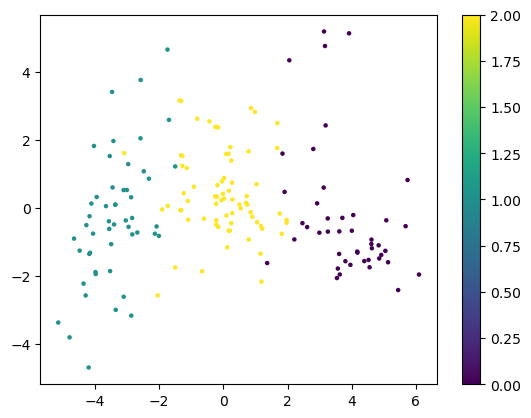

In [261]:
# Hierarchichal clustering
from sklearn.cluster import AgglomerativeClustering
hierar = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward').fit(vis)
plt.scatter(vis[:, 0], vis[:, 1], s=5, c=hierar.labels_)
plt.colorbar()

In [264]:
hierarchical = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
hierarchical_labels = hierarchical.fit_predict(df_scaled)
silhouette_hierarchical = silhouette_score(df_scaled, hierarchical_labels)
print(f"Silhouette Score: {silhouette_hierarchical}")


Silhouette Score: 0.1587117901436854


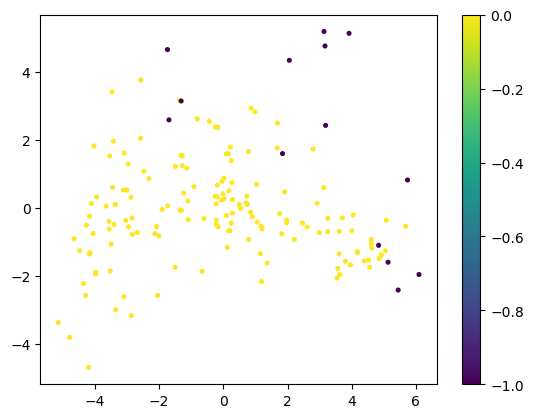

In [281]:
from sklearn.cluster import DBSCAN
dbsc = DBSCAN(eps = 4.5, min_samples = 10).fit(vis)
plt.scatter(vis[:,0], vis[:,1], s=7, c=dbsc.labels_)
plt.colorbar()

In [282]:
dbscan = DBSCAN(eps=4.5, min_samples=10)
dbscan_labels = dbscan.fit_predict(df_scaled)
silhouette_dbscan = silhouette_score(df_scaled, dbscan_labels)
print(f"Silhouette Score for DBSCAN: {silhouette_dbscan:.3f}")


Silhouette Score for DBSCAN: 0.154


In [285]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3, random_state=0)

# Fit the GMM to the data
gmm.fit(vis)

# Predict the cluster labels
gmm_labels = gmm.predict(vis)
silhouette_gmm = silhouette_score(df_scaled, gmm_labels)
print(f"Silhouette Score for DBSCAN: {silhouette_gmm:.3f}")



Silhouette Score for DBSCAN: 0.158


In [288]:
vis[4, :]


array([ 1.75451277, -0.17143791, -1.14860612, -0.10750046,  1.07410301,
       -0.41574735, -0.19451665, -0.15780629,  0.56487581, -1.22535978,
        0.92516971,  0.08481982,  1.56207161, -0.76256104])

In [295]:
gmm.predict(vis[90, :].reshape(1, -1))

array([1])

In [361]:
import pickle

pickle_out = open("clustering.pkl", mode = "wb")
pickle.dump(kmeans_new, pickle_out)
pickle_out.close()

In [344]:
df_copy.tail(26)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
141,St. Vincent and the Grenadines,20.7,26.9,4.47,57.1,9920,4.440,71.6,2.07,6230
142,Sudan,76.7,19.7,6.32,17.2,3370,19.600,66.3,4.88,1480
143,Suriname,24.1,52.5,7.01,38.4,14200,7.200,70.3,2.52,8300
144,Sweden,3.0,46.2,9.63,40.7,42900,0.991,81.5,1.98,52100
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600
146,Tajikistan,52.4,14.9,5.98,58.6,2110,12.500,69.6,3.51,738
147,Tanzania,71.9,18.7,6.01,29.1,2090,9.250,59.3,5.43,702
148,Thailand,14.9,66.5,3.88,60.8,13500,4.080,76.6,1.55,5080
149,Timor-Leste,62.6,2.2,9.12,27.8,1850,26.500,71.1,6.23,3600
150,Togo,90.3,40.2,7.65,57.3,1210,1.180,58.7,4.87,488


In [352]:
df_copy.head(26)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840
